<a href="https://colab.research.google.com/github/akula-33/MarketingCampaign-Impact-Dashboard/blob/main/MarketingCampaign_Impact_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign Effectiveness Analysis**

### **Step 1: Set Up the Environment**

In [ ]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


### **Step 2: Import Libraries and Load Data**

In [ ]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
#Load the Data
campaigns_df = pd.read_csv('/content/campaigns_effectiveness.csv')
responses_df = pd.read_csv('/content/responses_effectiveness.csv')
orders_df = pd.read_csv('/content/orders_effectiveness.csv')

### **Step 3: Data Cleaning and Preparation**

In [ ]:
#Examine the Data
campaigns_df.head()

,campaign_id,name,start_date,end_date,channel,cost
0,1,Enhanced encompassing matrix,2023-09-11,2023-10-08,Search Engine,8323.97
1,2,Multi-lateral multi-state monitoring,2023-08-27,2023-09-11,Social Media,8649.83
2,3,Upgradable analyzing projection,2023-10-24,2023-11-16,Affiliate,NaN
3,4,Secured stable archive,2023-11-08,2023-12-04,Affiliate,8906.76
4,5,Profound non-volatile encoding,2023-12-26,2024-01-07,Affiliate,5390.34


In [ ]:
responses_df.head()

,response_id,campaign_id,user_id,response_type,response_date
0,1,1,79,unknown,2023-08-18
1,2,1,93,clicked,2024-01-07
2,3,7,98,clicked,2024-05-15
3,4,17,76,clicked,2024-03-21
4,5,8,69,purchased,2024-07-05


In [ ]:
orders_df.head()

,order_id,user_id,product_id,quantity,order_date,shipping_date,delivery_date,order_status,total_amount
0,1,54,11,3,2024-01-20,2024-01-21,2024-01-24,pending,415.90
1,2,97,23,1,2023-09-25,2023-09-26,2023-10-02,pending,435.41
2,3,90,11,1,2024-02-26,2024-02-28,2024-03-01,shipped,365.50
3,4,52,49,2,2024-04-28,2024-05-01,2024-05-02,cancelled,115.86
4,5,5,28,2,2023-08-10,2023-08-12,2023-08-14,shipped,149.58


In [ ]:
# Check for missing values
print(campaigns_df.isnull().sum())
print(responses_df.isnull().sum())
print(orders_df.isnull().sum())

campaign_id    0
name           0
start_date     0
end_date       0
channel        0
cost           3
dtype: int64
response_id      0
campaign_id      0
user_id          0
response_type    0
response_date    0
dtype: int64
order_id         0
user_id          0
product_id       0
quantity         0
order_date       0
shipping_date    0
delivery_date    0
order_status     0
total_amount     0
dtype: int64


***Handling Missing Values***

In [ ]:
# Fill missing values in 'cost' column with the median
campaigns_df['cost'].fillna(campaigns_df['cost'].median(), inplace=True)
print(campaigns_df.isnull().sum())

campaign_id    0
name           0
start_date     0
end_date       0
channel        0
cost           0
dtype: int64


***Correct 'Unknown' Values***

In [ ]:
# Replace 'unknown' with np.nan or a suitable value
responses_df['response_type'].replace('unknown', np.nan, inplace=True)
responses_df.head()

,response_id,campaign_id,user_id,response_type,response_date
0,1,1,79,NaN,2023-08-18
1,2,1,93,clicked,2024-01-07
2,3,7,98,clicked,2024-05-15
3,4,17,76,clicked,2024-03-21
4,5,8,69,purchased,2024-07-05


***Converting Dates***

In [ ]:
#Ensure date columns are in the correct datetime format
campaigns_df['start_date'] = pd.to_datetime(campaigns_df['start_date'])
campaigns_df['end_date'] = pd.to_datetime(campaigns_df['end_date'])
responses_df['response_date'] = pd.to_datetime(responses_df['response_date'])

***Merging Datasets***

In [ ]:
# Merge datasets on campaign_id and user_id
merged_df = pd.merge(responses_df, campaigns_df, on='campaign_id', how='left')
merged_df = pd.merge(merged_df, orders_df, on='user_id', how='left')

### **Step 4: Feature Engineering**

***1) Campaign Duration***

In [ ]:
# Calculate duration of each campaign
campaigns_df['campaign_duration'] = (campaigns_df['end_date'] - campaigns_df['start_date']).dt.days
campaigns_df.head()

,campaign_id,name,start_date,end_date,channel,cost,campaign_duration
0,1,Enhanced encompassing matrix,2023-09-11,2023-10-08,Search Engine,8323.97,27
1,2,Multi-lateral multi-state monitoring,2023-08-27,2023-09-11,Social Media,8649.83,15
2,3,Upgradable analyzing projection,2023-10-24,2023-11-16,Affiliate,6372.06,23
3,4,Secured stable archive,2023-11-08,2023-12-04,Affiliate,8906.76,26
4,5,Profound non-volatile encoding,2023-12-26,2024-01-07,Affiliate,5390.34,12


***2) Response Rate***

In [ ]:
#Determine the response rate for each campaign.
response_rate_df = merged_df.groupby('campaign_id').agg({'response_id': 'count'}).reset_index()
response_rate_df.columns = ['campaign_id', 'response_rate']
response_rate_df.head()

,campaign_id,response_rate
0,1,242
1,2,265
2,3,254
3,4,213
4,5,267


***3) Conversion Rate***

In [ ]:
#Calculate the conversion rate, which reflects the percentage of responses that led to purchases.
merged_df['converted'] = merged_df['total_amount'].notnull().astype(int)

conversion_rate_df = merged_df.groupby('campaign_id').agg(
    responses=('response_id', 'count'),
    conversions=('converted', 'sum')
).reset_index()
conversion_rate_df['conversion_rate'] = (conversion_rate_df['conversions'] / conversion_rate_df['responses']) * 100
conversion_rate_df.head()

,campaign_id,responses,conversions,conversion_rate
0,1,242,241,99.586777
1,2,265,264,99.622642
2,3,254,253,99.606299
3,4,213,212,99.530516
4,5,267,267,100.000000


***4) Cost Per Acquisition (CPA)***

In [ ]:
#Compute the cost per acquisition by dividing the campaign cost by the conversion rate.
# Merge 'campaigns_df' with 'conversion_rate_df' to include conversion rates
cpa_df = campaigns_df.merge(conversion_rate_df[['campaign_id', 'conversion_rate']], on='campaign_id', how='left')

# Now calculate CPA using the conversion rate
cpa_df['CPA'] = cpa_df['cost'] / (cpa_df['conversion_rate'] / 100)
cpa_df.head()

,campaign_id,name,start_date,end_date,channel,cost,campaign_duration,conversion_rate,CPA
0,1,Enhanced encompassing matrix,2023-09-11,2023-10-08,Search Engine,8323.97,27,99.586777,8358.509295
1,2,Multi-lateral multi-state monitoring,2023-08-27,2023-09-11,Social Media,8649.83,15,99.622642,8682.594508
2,3,Upgradable analyzing projection,2023-10-24,2023-11-16,Affiliate,6372.06,23,99.606299,6397.246008
3,4,Secured stable archive,2023-11-08,2023-12-04,Affiliate,8906.76,26,99.530516,8948.773019
4,5,Profound non-volatile encoding,2023-12-26,2024-01-07,Affiliate,5390.34,12,100.000000,5390.340000


***5) Return on Investment (ROI)***

In [ ]:
#Calculate the ROI by comparing revenue generated from the campaign to the campaign's cost.
merged_df['revenue'] = merged_df['total_amount'].fillna(0)
roi_df = merged_df.groupby('campaign_id').agg({'revenue': 'sum', 'cost': 'first'}).reset_index()
roi_df['ROI'] = (roi_df['revenue'] - roi_df['cost']) / roi_df['cost'] * 100
roi_df.head()

,campaign_id,revenue,cost,ROI
0,1,60459.11,8323.97,626.325419
1,2,63970.78,8649.83,639.561124
2,3,62997.65,6372.06,888.654376
3,4,55535.17,8906.76,523.517081
4,5,67770.81,5390.34,1157.264106


### **Step 5: Data Analysis**

***1) Analyzing High ROI Campaigns***

In [ ]:
high_roi_campaigns = roi_df.sort_values(by='ROI', ascending=False).head(10)
high_roi_campaigns

,campaign_id,revenue,cost,ROI
14,15,68735.67,1252.71,5386.957875
15,16,68863.82,2865.30,2303.372073
17,18,62169.79,2879.45,2059.085589
11,12,85402.54,4138.32,1963.700729
6,7,62522.55,3729.10,1576.612319
4,5,67770.81,5390.34,1157.264106
13,14,79028.47,6372.06,1140.234241
5,6,75221.67,6375.56,1079.844123
12,13,73581.30,6372.06,1054.749014
9,10,68764.21,6372.06,979.151954


***2) Effective Marketing Channels***

In [ ]:
channel_analysis = merged_df.groupby('channel').agg({'response_id': 'count', 'total_amount': 'sum'}).reset_index()
channel_analysis.head()

,channel,response_id,total_amount
0,Affiliate,1550,395163.98
1,Email,766,200122.04
2,Search Engine,1378,356834.41
3,Social Media,1326,336873.46


***3) Customer Segmentation***

In [ ]:
#Analyze customer segments to see which groups responded best to specific campaigns
customer_segments = merged_df.groupby(['user_id', 'campaign_id']).agg({'total_amount': 'sum'}).reset_index()
customer_segments

,user_id,campaign_id,total_amount
0,1,1,763.58
1,1,2,763.58
2,1,5,381.79
3,1,7,381.79
4,1,11,381.79
...,...,...,...
792,100,14,627.13
793,100,15,627.13
794,100,16,627.13
795,100,17,627.13


***4) Engagement Metrics***

In [ ]:
#Evaluate engagement metrics like CTR and conversion rates
engagement_metrics = merged_df.groupby('campaign_id').agg({
    'response_id': 'count',
    'user_id': 'nunique',
    'total_amount': 'sum'
}).reset_index()
engagement_metrics['CTR'] = (engagement_metrics['response_id'] / engagement_metrics['user_id']) * 100
engagement_metrics.head()

,campaign_id,response_id,user_id,total_amount,CTR
0,1,242,36,60459.11,672.222222
1,2,265,43,63970.78,616.279070
2,3,254,38,62997.65,668.421053
3,4,213,41,55535.17,519.512195
4,5,267,46,67770.81,580.434783


### **Step 6: Data Visualization**

***1) ROI Visualization***

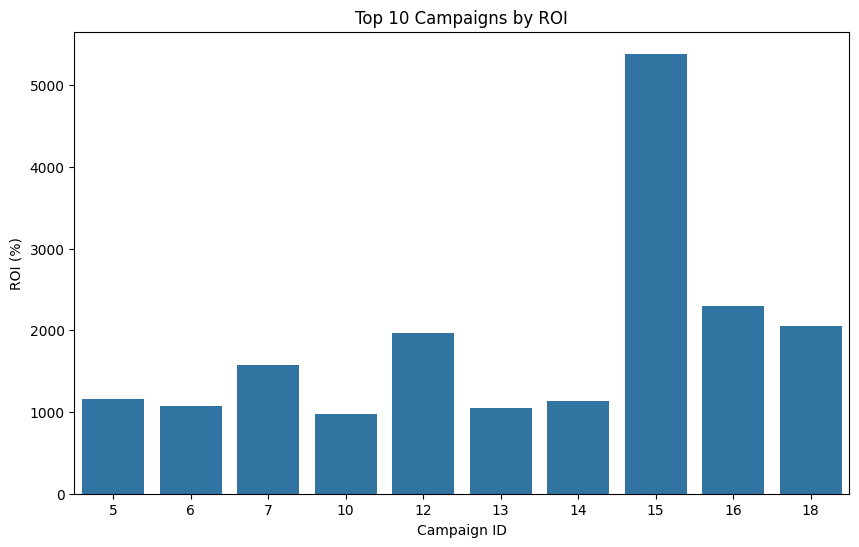

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=high_roi_campaigns, x='campaign_id', y='ROI')
plt.title('Top 10 Campaigns by ROI')
plt.xlabel('Campaign ID')
plt.ylabel('ROI (%)')
plt.show()

***2) Channel Effectiveness***

<Figure size 800x800 with 0 Axes>

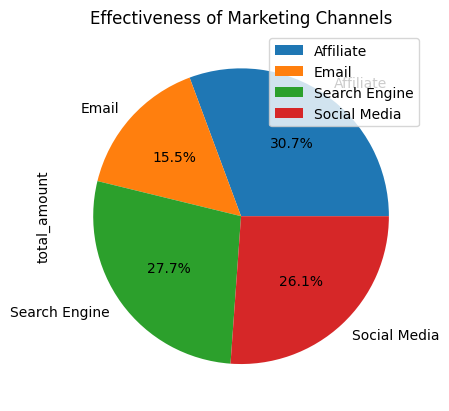

In [ ]:
plt.figure(figsize=(8, 8))
channel_analysis.plot(kind='pie', y='total_amount', autopct='%1.1f%%', labels=channel_analysis['channel'])
plt.title('Effectiveness of Marketing Channels')
plt.show()

***3) Engagement Metrics***

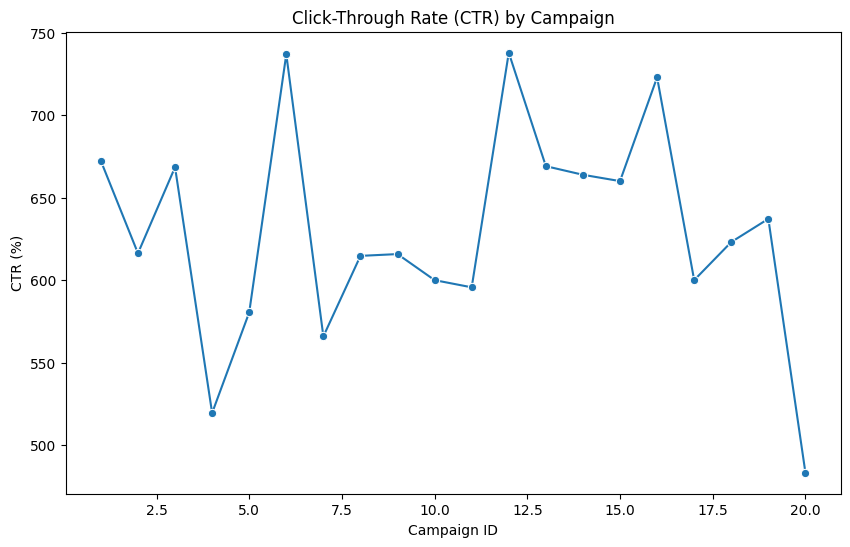

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=engagement_metrics, x='campaign_id', y='CTR', marker='o')
plt.title('Click-Through Rate (CTR) by Campaign')
plt.xlabel('Campaign ID')
plt.ylabel('CTR (%)')
plt.show()